<a href="https://colab.research.google.com/github/TomasPastore/aprendizaje_automatico_tp/blob/main/tp_AA_grupo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

# Lectura del dataset

In [ ]:
url = 'https://raw.githubusercontent.com/aprendizaje-automatico-dc-uba-ar/material/main/tp/01_aprendizaje_supervisado/datos/minions_publicos.csv'
minions_dataset = pd.read_csv(url)

y = minions_dataset.iloc[:,-1:]
print(y[y["target"] == 1])

del minions_dataset[minions_dataset.columns[-1]]
print("\n Features")
minions_dataset

     target
0         1
1         1
2         1
3         1
5         1
..      ...
483       1
490       1
491       1
497       1
499       1

[154 rows x 1 columns]

 Features


,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199
0,0.203777,-7.278026,2.756077,0.412740,-0.116626,0.414236,6.218588,0.018764,0.209555,0.005660,...,-8.551783,-5.323863,2.004479,-0.065859,-0.877748,0.221820,0.103884,-0.219372,2.179068,0.578645
1,1.084936,0.328886,4.545345,0.678987,0.003042,-0.807901,-13.653907,-0.654958,-0.860854,-1.017529,...,1.195129,-20.574463,0.119288,0.505041,0.922128,0.405464,1.886947,0.407544,1.431193,0.159015
2,0.769527,-1.213339,-1.821305,-0.816333,3.059691,-0.583517,22.961234,-1.034725,-0.039125,0.983415,...,2.926464,14.608653,-0.456923,-0.647099,-0.565453,-0.137190,-0.232586,-1.420808,-0.843064,0.274254
3,-0.094123,-0.567694,1.747513,0.033398,7.415277,-0.756049,-1.021780,-0.662921,-0.671345,-0.159661,...,4.750111,21.559404,0.188952,0.137507,1.186905,0.955207,0.589803,1.509390,0.992935,1.875483
4,0.116567,-1.551208,9.343513,-1.785618,-2.651805,0.955870,-0.952141,-0.854849,-0.679621,0.682699,...,0.364826,24.729498,-0.585663,-1.551728,0.239188,-0.882897,0.129474,0.019597,-0.322608,0.302670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.288139,-1.396761,-4.263799,0.749690,1.721721,-0.344043,19.469950,0.662457,0.557387,-0.190842,...,1.589264,17.684302,-1.333075,0.388253,1.314865,0.244731,-0.051043,0.768067,-1.622517,-0.276086
496,0.153794,-1.877765,0.514750,3.191452,2.515170,0.214678,1.100869,-0.641812,-0.192485,2.340703,...,-0.849789,-12.417970,0.906713,-0.066838,1.210734,1.491540,1.586784,-0.445346,1.701997,-0.326600
497,0.128327,-2.151517,-6.010139,-5.710254,-2.606002,-0.326701,-3.537265,-0.786013,-0.985565,0.120138,...,-10.669278,-7.494708,0.520567,-1.523764,0.714171,0.222749,-0.126531,-0.074166,-0.752975,-1.750938
498,0.907801,2.899501,-2.170869,1.386165,4.658550,0.172423,2.034290,0.563519,-1.294684,0.853006,...,0.691517,-18.558853,1.667956,0.697122,2.236943,-0.629723,0.969926,-1.121823,-0.413634,0.321612


Esto nos indica que hay 154 de clase positiva y el resto de clase negativa. Es decir, está desbalanceado en aproximadamente 30/70. Tenemos que tener en cuenta entonces esto a la hora de splitear los datos.

## Ejercicio 1

### Separación de datos

Contarán con una cantidad limitada de datos, por lo cual es importante tomar una buena decisión en el momento de empezar a utilizarlos. 

Evaluar y justificar cómo separarán sus datos para desarrollo y para evaluación. Los datos seleccionados para la competencia fueron extraidos al azar. 

# 1)

Al contar con 500 postulados sabemos que tenemos una base de datos reducida, por lo que elegir una separación de datos acorde resultará vital para poder desarrollar un buen modelo y a la vez tener suficientes datos para generar una estimación sobre un set de evaluación final.
En nuestro grupo optamos por realizar una separacion del 10% del dataset para la evaluacion final (lo dejaremos de lado en la etapa de desarrollo). Por otro lado utilizaremos el 90% restante para la etapa de desarrollo de modelos.
Consideramos tomar una proporción un poco mayor como 20% pero supusimos que quedaría una cantidad insuficiente de datos para entrenar.
A su vez es importante destacar que para esta separación utilizaremos _stratified k fold_ ya que como vimos en la celda anterior hay un desbalance en las etiquetas de los minions de 30/70 y queremos mantener esa proporción de clases en nuestro set de evaluación.



In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_eval, y_dev, y_eval = train_test_split(minions_dataset.values, y.values, shuffle=True, stratify=y, random_state=4, test_size=0.1) 

print(f"X_desarrollo dimensión: {X_dev.shape}")
print(f"y_desarrollo dimensión: {y_dev.shape}")

print(f"X_eval dimensión: {X_eval.shape}")
print(f"y_eval dimensión: {y_eval.shape}")


X_desarrollo dimensión: (450, 200)
y_desarrollo dimensión: (450, 1)
X_eval dimensión: (50, 200)
y_eval dimensión: (50, 1)


## Ejercicio 2


### Construcción de modelos

Para este punto, la tarea consiste en construir y evaluar modelos de tipo árbol de decisión, de manera de obtener una **estimación realista de la performance** de los mismos. 

1. Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default.

1. Estimar la performance del modelo utilizando _K-fold cross validation_ con `K=5`, con las métricas _Accuracy_ y _ROC AUC_. 

   En esta oportunidad se va a pedir, además de calcular el score global (como vimos en clase), que calculen las métricas para cada fold por separado.
   Reportar el resultado en una tabla similar a:

      <table>
      <thead>
      <tr>
      <th align="center">Permutación</th>
      <th>Accuracy (training)</th>
      <th>Accuracy (validación)</th>
      <th>AUC ROC (training)</th>
      <th>AUC ROC (validación)</th>
      </tr>
      </thead>
      <tbody>
      <tr>
      <td align="center">1</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">2</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">3</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">4</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">5</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">Global</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      </tbody>
      </table>

      **Importante**: de acá en más sólamente utilizaremos el score global cuando hagamos _K-fold cross-validation_.
   

## 2.1) Árbol default con max_height 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arbol_gini_3 = DecisionTreeClassifier(max_depth=3)

## 2.2) Árbol default (gini) altura 3 + Crossvalidation K=5 + Accuracy y AUC por fold y globales

Utilizamos Stratified K Fold, guardando las metricas Accuracy y AUC de training y validación de cada fold. 

Además guardamos las predicciones y probabilidades de cada instancia en un vector global, en el caso de validación habrá un solo valor para cada instancia, mientras que en training guardaremos k-1 predicciones y k-1 probabilidades, ya que cada instancia se utiliza k-1 veces para entrenar. 

Finalmente para calcular el score global de training tomaremos el label más frecuente de cada instancia en caso de las predicciones, para luego calcular el train_global_accuracy; y la mediana de las probabilidades de cada instancia para luego calcular el train_global_auc.

In [ ]:
from collections import Counter
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Iterador de Cross validation
balanced_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {'roc_auc': metrics.make_scorer(metrics.roc_auc_score, needs_proba=True),
           'accuracy': metrics.make_scorer(metrics.accuracy_score)
           }

# Crossvalidation with one fixed configuration of hyperparameters.
# scoring is a dictionary with the metrics we want to calculate
# cv is a cross validation iterator

def cross_validate_uba(clf, X, y, scoring, cv, score_train=True):
    n = len(y)
    k = cv.n_splits

    train_global_preds = np.empty(n, dtype=list) # train samples will be scored k-1 times
    train_global_preds[:] = [ [] for i in range(n)]
    train_global_probas = np.empty(n, dtype=list)  # we will save only the proba of POSITIVE class
    train_global_probas[:] = [ [] for i in range(n)]
    test_global_preds = np.zeros(n)
    test_global_probas = np.zeros(n)
    
    cv_results = dict(train_global_preds=train_global_preds,
                      train_global_probas=train_global_probas,
                      train_folds_accuracy=[],
                      train_folds_auc=[], 
                      test_global_preds=test_global_preds,
                      test_global_probas=test_global_probas,
                      test_folds_accuracy=[],
                      test_folds_auc=[],
                      ) 

    for train_idxs, test_idxs in cv.split(X, y):
        X_train = X[train_idxs]
        y_train = y[train_idxs]
        X_test = X[test_idxs]
        y_test = y[test_idxs]
        
        clf.fit(X_train, y_train)
        if score_train:
            # Scores sobre train
            y_pred_train = clf.predict(X_train)
            y_proba_train = clf.predict_proba(X_train)[:, 1]
            # para cada instancia busco su lista de scores de cada fold y le agrego el score de este fold
            for fold_scores_i, fold_score_i in zip(cv_results["train_global_preds"][train_idxs], y_pred_train):
              fold_scores_i.append(fold_score_i)
            for fold_scores_i, fold_score_i in zip(cv_results["train_global_probas"][train_idxs], y_proba_train):
              fold_scores_i.append(fold_score_i)
            
            cv_results["train_folds_accuracy"].append( scoring["accuracy"]._score_func(y_train, y_pred_train, **scoring["accuracy"]._kwargs) )
            cv_results["train_folds_auc"].append( scoring["roc_auc"]._score_func(y_train, y_proba_train, **scoring["roc_auc"]._kwargs) )

        # Scores sobre test
        y_pred_test = clf.predict(X_test)
        y_proba_test = clf.predict_proba(X_test)[:, 1]
        cv_results["test_global_preds"][test_idxs] = y_pred_test
        cv_results["test_global_probas"][test_idxs] = y_proba_test
        cv_results["test_folds_accuracy"].append( scoring["accuracy"]._score_func(y_test, y_pred_test, **scoring["accuracy"]._kwargs))
        cv_results["test_folds_auc"].append( scoring["roc_auc"]._score_func(y_test, y_proba_test, **scoring["roc_auc"]._kwargs))
    

    return cv_results

def cv_with_metrics(classifier_to_train, X, y, scoring, cv, score_train=False, full_text=True):

    if isinstance(classifier_to_train, DecisionTreeClassifier) or isinstance(classifier_to_train, RandomForestClassifier):
        clf = classifier_to_train
    else: 
        clf = make_pipeline(preprocessing.StandardScaler(), classifier_to_train)

    t0 = timeit.default_timer()
    cv_results = cross_validate_uba(clf, X, y=y, scoring=scoring, cv=cv, score_train=score_train)
    t1 = timeit.default_timer()
    cross_val_time = t1 - t0

    print(f'Crossvalidation metrics for {clf}...\n')
    
    if score_train:
        # for each train instance we calculate the most common label that was predicted so we can then calculate a global accuracy
        most_common_preds = [Counter(instance_preds).most_common(1)[0][0] for instance_preds in cv_results['train_global_preds']]
        cv_results['train_global_accuracy'] = scoring["accuracy"]._score_func(y, most_common_preds, **scoring["accuracy"]._kwargs)

        # for each train instance we calculate the mean or median of probas across the different folds so we can then calculate a global AUC
        global_probas = [np.median(instance_probas) for instance_probas in cv_results['train_global_probas']]
        cv_results['train_global_auc'] = scoring["roc_auc"]._score_func(y, global_probas, **scoring["roc_auc"]._kwargs)

    cv_results['test_global_accuracy'] = scoring["accuracy"]._score_func(y, cv_results['test_global_preds'], **scoring["accuracy"]._kwargs)
    cv_results['test_global_auc'] = scoring["roc_auc"]._score_func(y, cv_results['test_global_probas'], **scoring["roc_auc"]._kwargs)

    if full_text:
      if score_train:
          print(f"""Accuracy [TRAINING]:
      Global --> {cv_results['train_global_accuracy']:.3f}
      Folds: 
      \tRaw --> {list(map(lambda x: round(x, 3), cv_results['train_folds_accuracy']))}
      \tMean --> {np.mean(cv_results['train_folds_accuracy']):.3f}
      \tSTD --> {np.std(cv_results['train_folds_accuracy']):.3f}
      \tMedian --> {np.median(cv_results['train_folds_accuracy']):.3f}""")

      print(f"""Accuracy [VALIDATION]:
      Global --> {cv_results['test_global_accuracy']:.3f}
      Folds: 
      \tRaw --> {list(map(lambda x: round(x, 3), cv_results['test_folds_accuracy']))}
      \tMean --> {np.mean(cv_results['test_folds_accuracy']):.3f}
      \tSTD --> {np.std(cv_results['test_folds_accuracy']):.3f}
      \tMedian --> {np.median(cv_results['test_folds_accuracy']):.3f}""")

      if score_train:
          print(f"""AUC [TRAINING]:
      Global --> {cv_results['train_global_auc']:.3f}
      Folds: 
      \tRaw --> {list(map(lambda x: round(x, 3), cv_results['train_folds_auc']))}
      \tMean --> {np.mean(cv_results['train_folds_auc']):.3f}
      \tSTD --> {np.std(cv_results['train_folds_auc']):.3f} 
      \tMedian --> {np.median(cv_results['train_folds_auc']):.3f}""")

    test_global_auc = cv_results['test_global_auc']  
    print(f"""AUC [VALIDATION]:
    Global --> {test_global_auc:.3f}
    Folds: 
    \tRaw --> {list(map(lambda x: round(x, 3), cv_results['test_folds_auc']))}
    \tMean --> {np.mean(cv_results['test_folds_auc']):.3f}
    \tSTD --> {np.std(cv_results['test_folds_auc']):.3f} 
    \tMedian --> {np.median(cv_results['test_folds_auc']):.3f}""")

    return test_global_auc, cross_val_time


In [ ]:
# Corremos el K fold cross validation para una configuracion fija
cv_with_metrics(arbol_gini_3, X_dev, y_dev, scoring, cv=balanced_k_fold, score_train=True)

Crossvalidation metrics for DecisionTreeClassifier(max_depth=3)...

Accuracy [TRAINING]:
      Global --> 0.840
      Folds: 
      	Raw --> [0.775, 0.789, 0.811, 0.811, 0.814]
      	Mean --> 0.800
      	STD --> 0.015
      	Median --> 0.811
Accuracy [VALIDATION]:
      Global --> 0.673
      Folds: 
      	Raw --> [0.611, 0.689, 0.744, 0.644, 0.678]
      	Mean --> 0.673
      	STD --> 0.045
      	Median --> 0.678
AUC [TRAINING]:
      Global --> 0.898
      Folds: 
      	Raw --> [0.793, 0.676, 0.826, 0.836, 0.795]
      	Mean --> 0.785
      	STD --> 0.057 
      	Median --> 0.795
AUC [VALIDATION]:
    Global --> 0.609
    Folds: 
    	Raw --> [0.586, 0.536, 0.635, 0.661, 0.617]
    	Mean --> 0.607
    	STD --> 0.043 
    	Median --> 0.617


(0.6093478914617502, 0.18298833400012882)

## Resultados
<table>
      <thead>
      <tr>
      <th align="center">Permutación</th>
      <th>Accuracy (training)</th>
      <th>Accuracy (validación)</th>
      <th>AUC ROC (training)</th>
      <th>AUC ROC (validación)</th>
      </tr>
      </thead>
      <tbody>
      <tr> 
      <td align="center">1</td>
      <td>0.775</td>
      <td>0.611</td>
      <td>0.793</td>
      <td>0.586</td>
      </tr>
      <tr>
      <td align="center">2</td>
      <td>0.789</td>
      <td>0.689</td>
      <td>0.676</td>
      <td>0.536</td>
      </tr>
      <tr>
      <td align="center">3</td>
      <td>0.811</td>
      <td>0.744</td>
      <td>0.826</td>
      <td>0.635</td>
      </tr>
      <tr>
      <td align="center">4</td>
      <td>0.811</td>
      <td>0.644</td>
      <td>0.836</td>
      <td>0.661</td>
      </tr>
      <tr>
      <td align="center">5</td>
      <td>0.814</td>
      <td>0.678</td>
      <td>0.795</td>
      <td>0.617</td>
      </tr>
      <tr>
      <td align="center">Global</td>
      <td>0.840</td>
      <td>0.673</td>
      <td>0.898</td>
      <td>0.609</td>
      </tr>
      </tbody>
      </table>

  La tabla sugiere que para un modelo tan simple como nuestro árbol, el sesgo es alto y se subestima la complejidad del problema, dando valores de AUC bajos sobre los sets de datos no vistos (validación), además accuracy es una métrica más optimista que el AUC, debido al desbalance de las clases anteriormente mencionado.

#2.3) ParameterGrid con árboles

3. Explorar las siguientes combinaciones de parámetros para  árboles de decisión (siguiendo con $k-fold$ con $k=5$) utilizando [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html) de _scikit learn_. No está permitido utilizar `GridSearchCV` en este ejercicio.

   <table>
   <thead>
   <tr>
   <th align="center">Altura máxima</th>
   <th align="center">Criterio de corte</th>
   <th>Accuracy (training)</th>
   <th>Accuracy (validación)</th>
   </tr>
   </thead>
   <tbody><tr>
   <td align="center">3</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">3</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   </tbody></table>


   ¿Qué conclusiones se pueden sacar de esta tabla?

In [ ]:
from sklearn.model_selection import ParameterGrid

def parameter_grid_search(classifier, grid):
    param_grid = ParameterGrid(grid)
    for config in param_grid:
        print('---------------------------------------------------------------')
        classifier.set_params(**config)
        cv_with_metrics(classifier, X_dev, y_dev, scoring, cv=balanced_k_fold, score_train=True)


In [ ]:
grid_arbol = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5]
}
parameter_grid_search(classifier=arbol_gini_3, grid=grid_arbol)

---------------------------------------------------------------
Crossvalidation metrics for DecisionTreeClassifier()...

Accuracy [TRAINING]:
      Global --> 1.000
      Folds: 
      	Raw --> [1.0, 1.0, 1.0, 1.0, 1.0]
      	Mean --> 1.000
      	STD --> 0.000
      	Median --> 1.000
Accuracy [VALIDATION]:
      Global --> 0.658
      Folds: 
      	Raw --> [0.589, 0.722, 0.711, 0.622, 0.644]
      	Mean --> 0.658
      	STD --> 0.051
      	Median --> 0.644
AUC [TRAINING]:
      Global --> 1.000
      Folds: 
      	Raw --> [1.0, 1.0, 1.0, 1.0, 1.0]
      	Mean --> 1.000
      	STD --> 0.000 
      	Median --> 1.000
AUC [VALIDATION]:
    Global --> 0.601
    Folds: 
    	Raw --> [0.537, 0.681, 0.653, 0.53, 0.605]
    	Mean --> 0.601
    	STD --> 0.060 
    	Median --> 0.605
---------------------------------------------------------------
Crossvalidation metrics for DecisionTreeClassifier(max_depth=3)...

Accuracy [TRAINING]:
      Global --> 0.840
      Folds: 
      	Raw --> [0.775,

## Resultados

<table>
   <thead>
   <tr>
   <th align="center">Altura máxima</th>
   <th align="center">Criterio de corte</th>
   <th>Accuracy (training)</th>
   <th>Accuracy (validación)</th>
   </tr>
   </thead>
   <tbody><tr>
   <td align="center">3</td>
   <td align="center">Gini</td>
   <td>0.840</td>
   <td>0.676</td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Gini</td>
   <td>0.927</td>
   <td>0.689</td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Gini</td>
   <td>1.0</td>
   <td>0.658</td>
   </tr>
   <tr>
   <td align="center">3</td>
   <td align="center">Entropía</td>
   <td>0.813</td>
   <td>0.660</td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Entropía</td>
   <td>0.947</td>
   <td>0.647</td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Entropía</td>
   <td>1.0</td>
   <td>0.629</td>
   </tr>
   </tbody></table>

  # Conclusiones 



Podemos observar que si el modelo inicial es muy simple (alto sesgo) el aumento en la altura máxima de los árboles puede llegar a mejorar la performance en los datos de validación ya que suma complejidad al modelo, como sucede en el caso de pasar de 3 a 5 con Gini. Sin embargo en algún punto seguir aumentando la altura máxima produce un sobreajuste a los datos de entrenamiento, lo que deriva en una pérdida en el poder de generalización en datos no vistos que vemos reflejada en la caida de los scores de validación al aumentar a infinito la altura del árbol. Es decir, si los arboles tienen altura infinita van a asegurarse de que podamos clasificar correctamente todas las instancias de train (por eso el accuracy de train aumenta a medida que incrementamos la altura máxima); sin embargo esto muestra evidencias de overfitting ya que a pesar de una mejora sustancial en la accuracy de train, la accuracy de validation empeora. 


## Ejercicio 3: Comparación de algoritmos


Se pide explorar distintas combinaciones de algoritmos de aprendizaje con diferentes configuraciones de manera de buscar la performance óptima. Para realizar la experimentación utilizar [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Como métrica de performance usar el área bajo la curva (AUC ROC) resultante de 5-fold cross-validation. 

Algoritmos a probar: 
  - Árboles de decisión
  - KNN (k-vecinos más cercanos)
  - SVM (Support vector machine)
  - LDA (Linear discriminant analysis)
  - Naïve Bayes
  
Hiperparámetros: Revisar la documentación de cada uno para la búsqueda de combinaciones prometedoras. 

Documentación extra sobre [`Tuning hyper-parameters`](https://scikit-learn.org/stable/modules/grid_search.html), leer hasta 3.2.2.

Se pide generar un reporte que contenga: 

1. Una descripción de las distintas combinaciones consideradas y su performance asociada (las que consideren relevantes, con al menos la mejor combinación para cada algoritmo). 

1. Una breve explicación de los factores que creen que produjeron dicho resultado. 

# 3) Comparación de algoritmos con RandomizedSearchCV

En este caso tomamos el promedio entre folds como el global ya que con RandomizedSearchCV no es posible calcular los globales

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

def fine_tune(X, y, classifier, model_name, grid, cv, scoring, n_settings=50):
    print('\nFine tuning {0}. Objective: {1}'.format(model_name, scoring))
    
    pipeline_clf = Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('clf', classifier)
        ])

    random_search = RandomizedSearchCV(estimator=pipeline_clf, param_distributions=grid, cv=cv, scoring="roc_auc", 
                                       n_iter=n_settings, random_state=42, n_jobs=-1)
    random_result = random_search.fit(X, y)
    print("Best score was : %f using %s" % (random_result.best_score_, random_result.best_params_))
    return random_result.best_estimator_
      

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from scipy.stats import uniform, randint

classifiers_to_test = {
    'Árbol de decisión': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'SVM' : SVC(random_state=42),
    'LDA' : LDA(),
    'Naïve Bayes': GaussianNB()
}

grids = dict()

grids['Árbol de decisión'] = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [3, 4, 5, 8, 10],
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__class_weight': ['balanced', None],
}
grids['KNN'] = {
    'clf__n_neighbors': range(5, 26, 5),
    'clf__weights': ['uniform', 'distance'],
    'clf__leaf_size': randint(20, 50),
    'clf__p': [1, 2],
}
grids['SVM'] = {
    'clf__C': [0.2, 0.5, 1, 2, 2.5, 3, 5],
    'clf__kernel': ['linear','poly', 'rbf', 'sigmoid'],
    'clf__degree': [2, 3],
}
grids['LDA'] = {
    'clf__solver': ['lsqr', 'eigen'],
    'clf__shrinkage': [None, 'auto', 0, 0.25, 0.5, 0.75, 1],
}
grids['Naïve Bayes'] = {
    'clf__var_smoothing': uniform(1e-9, 1e-7),
}

# Otra opcion para no tomar el promedio entre los 5 folds, la mediana es mas estable a outliers
def custom_roc_auc_score(y_true, y_pred):
    return np.median([metrics.roc_auc_score(y_true, y_pred[:,i]) for i in range(y_pred.shape[1])])
scoring_median = metrics.make_scorer(custom_roc_auc_score, needs_proba=True) # probamos y dio lo mismo que usar el default que es mean

best_classifier = dict()
for clf_name, clf in classifiers_to_test.items():
    # fine_tune devuelve el estimador cuya combinación de hyperparametros da mejor roc auc, 
    # entre n_settings combinaciones random restringidas a la grid
    best_classifier[clf_name] = fine_tune(X_dev, y_dev, clf, clf_name, grid=grids[clf_name], 
                                          cv=balanced_k_fold, scoring='roc_auc', n_settings=50)



Fine tuning Árbol de decisión. Objective: roc_auc
Best score was : 0.658634 using {'clf__splitter': 'random', 'clf__max_features': None, 'clf__max_depth': 3, 'clf__criterion': 'log_loss', 'clf__class_weight': 'balanced'}

Fine tuning KNN. Objective: roc_auc
Best score was : 0.797461 using {'clf__leaf_size': 37, 'clf__n_neighbors': 20, 'clf__p': 1, 'clf__weights': 'distance'}

Fine tuning SVM. Objective: roc_auc
Best score was : 0.847379 using {'clf__kernel': 'poly', 'clf__degree': 3, 'clf__C': 2.5}

Fine tuning LDA. Objective: roc_auc
Best score was : 0.829023 using {'clf__solver': 'lsqr', 'clf__shrinkage': 0.75}

Fine tuning Naïve Bayes. Objective: roc_auc
Best score was : 0.773393 using {'clf__var_smoothing': 3.845401188473625e-08}


El **peor** algoritmo resultó ser el **árbol de decisión**. Creemos que esto se debe a que un sólo árbol es un modelo muy simple y probablemente no esté logrando generalizar en datos no vistos debido al underfitting.

Por el contrario, **SVM** obtuvo el **mejor** promedio de AUC ROC entre folds usando un kernel polinomial de grado 3, creemos que esto permite crear un modelo más complejo que quizas esté capturando alguna relación no lineal entre los features y el target que los otros modelos no pueden llegar a representar.

Luego tenemos un valor dentro de todo aceptable para **KNN**, aunque considerando que nuestros conjuntos de entrenamiento son bastante pequeños en cada fold (~360) 20 vecinos puede llegar a ser un porcentaje demasiado grande y causar overfitting.

A su vez, podemos observar que **Bayes** no tuvo una gran performance, lo que atribuimos a que quizas tenemos pocos datos para un clasificador tan simple como Bayes que se basa escencialmente en las frecuencias de las clases.

Creemos que en nuestro caso que tenemos pocos datos pero muchas features en proporción, resulta más útil un modelo que logran capturar relaciones más complejas como **SVM**.


## Ejercicio 4: 
### Diagnóstico Sesgo-Varianza.

En este punto, se pide inspeccionar dos de sus mejores modelos encontrados hasta ahora: la mejor configuración para modelo de tipo árbol de decisión, la mejor configuración para LDA y la mejor configuración para SVM. Para ello:

1. Graficar curvas de complejidad para cada modelo (sólo SVM y árboles), variando la profundidad en el caso de árboles, y el hiperparámetro C en el caso de SVM. Diagnosticar cómo afectan al sesgo y a la varianza esos dos hiperparámetros.
2. Graficar curvas de aprendizaje para cada modelo. En base a estas curvas, sacar conclusiones sobre si los algoritmos parecen haber alcanzado su límite, o bien si aumentar la cantidad de datos debería ayudar.
3. Construir un modelo RandomForest con 200 árboles. Explorar para qué sirve el hiperparámetro max_features y cómo afecta a la performance del algoritmo mediante una curva de complejidad. Explicar por qué creen que se dieron los resultados obtenidos. Por último, graficar una curva de aprendizaje sobre los parámetros elegidos para determinar si sería útil o no conseguir más datos.


**Atención**: Tener en cuenta que debemos seguir utilizando ROC AUC como métrica para estas curvas.



#4) 

## 4.1) Complexity curves

### SVM

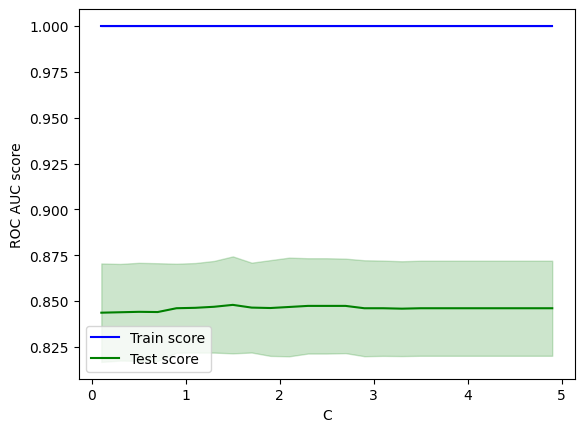

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

c_range = np.arange(0.1, 5, 0.2)
best_svm = best_classifier["SVM"] # Saved in exercise 3 cell

train_scores, test_scores = validation_curve(
    best_svm, X_dev, y_dev, 
    param_name='clf__C', param_range=c_range,
    cv=balanced_k_fold, scoring='roc_auc', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(c_range, train_mean, label='Train score', color='blue')
plt.fill_between(c_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(c_range, test_mean, label='Test score', color='green')
plt.fill_between(c_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('C')
plt.ylabel('ROC AUC score')
plt.legend(loc='best')
plt.show()


##¿Cómo afecta al sesgo y la varianza esta variación?
Al aumentar el C mejora levemente el promedio sobre validacion ya que la regularización permite ser mas flexible frente a patrones de datos no vistos.

### Decision Tree

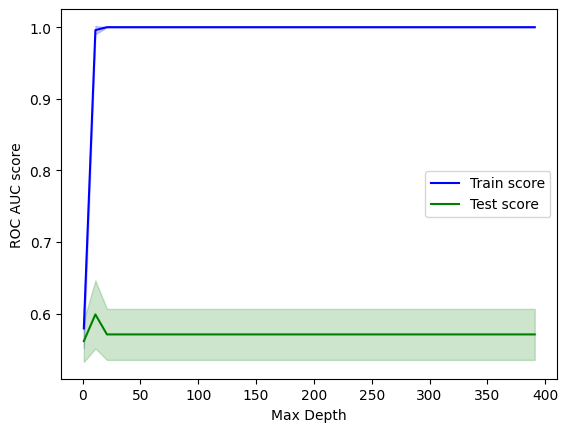

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

depth_range = range(1, 400, 10)
best_tree = best_classifier["Árbol de decisión"] # Saved in exercise 3 cell

train_scores, test_scores = validation_curve(
    best_tree, X_dev, y_dev, 
    param_name='clf__max_depth', param_range=depth_range,
    cv=balanced_k_fold, scoring='roc_auc', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(depth_range, train_mean, label='Train score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(depth_range, test_mean, label='Test score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('Max Depth')
plt.ylabel('ROC AUC score')
plt.legend(loc='best')
plt.show()


##¿Cómo afecta al sesgo y la varianza esta variación?

COMPLETAR

## 4.2) Learning curves


###SVM

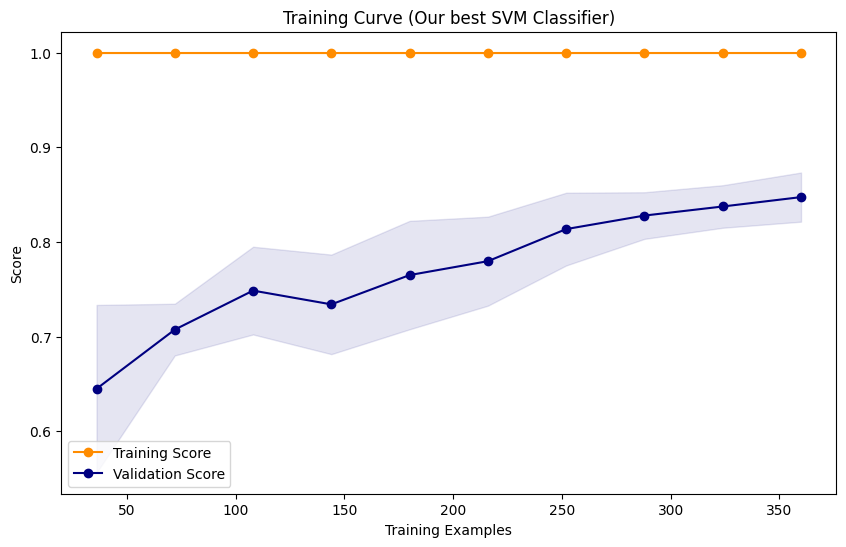

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_svm, X=X_dev, y=y_dev, 
    cv=balanced_k_fold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Training Curve (Our best SVM Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score", color='darkorange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Score", color='navy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="navy")
plt.legend(loc="best")
plt.show()

##¿El modelo alcanzó su "límite" de performance o aumentar la cantidad de datos debería ayudar?

Con los valores de AUC ROC obtenidos podemos ver que para el SVM aumentar el valor de C (mayor grado de regularización) mejora la performance sobre datos no vistos, lo que sugiere que si aumentaramos la cantidad de datos debería ayudar en la tarea de capturar información de la relación entre los features y el target.

### Decision Tree

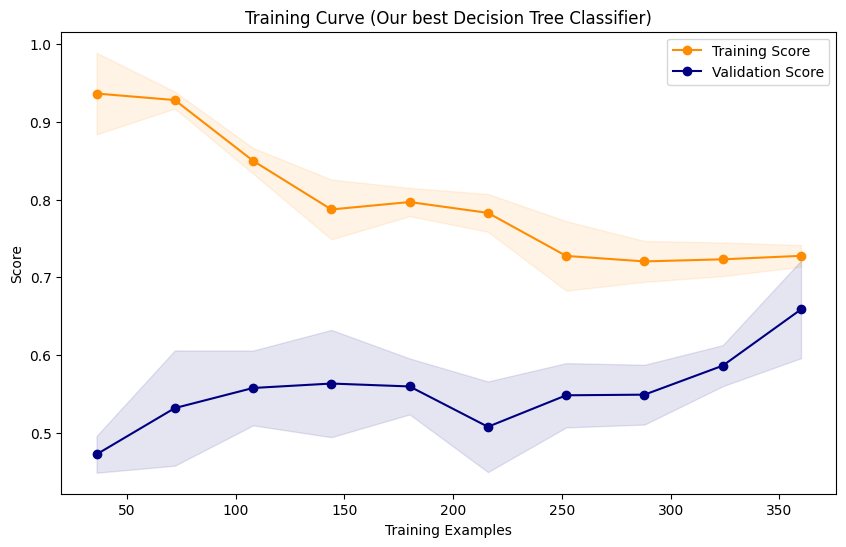

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_tree, X=X_dev, y=y_dev, 
    cv=balanced_k_fold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Training Curve (Our best Decision Tree Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score", color='darkorange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Score", color='navy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="navy")
plt.legend(loc="best")
plt.show()

##¿El modelo alcanzó su "límite" de performance o aumentar la cantidad de datos debería ayudar?

 Por el contrario, el gráfico de los AUC score de los árboles sugiere que la performance alcanza cierto grado de saturación, por lo que en este caso no ayudaría tener más datos. Esto tiene sentido considerando que es un modelo mucho más simple.

##4.3)

max features: Es el número de features que se tiene en cuenta cuando se busca el mejor corte en cada partición del árbol.

n_estimators: cantidad de árboles 

# Complexity Curve

ValueError: ignored

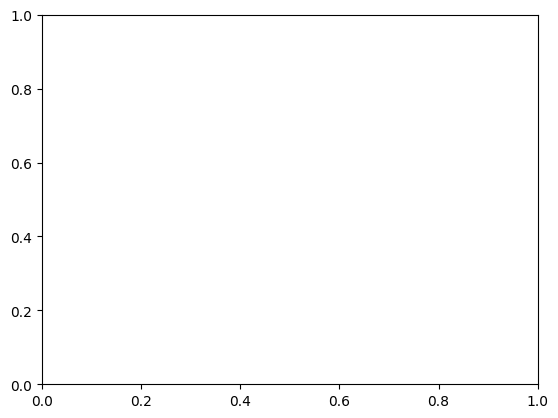

In [ ]:

from sklearn.model_selection import validation_curve

randomforest = RandomForestClassifier(n_estimators = 200, random_state=42)
max_features = list(range(1, 100, 20)) 

train_scores, test_scores = validation_curve(
    randomforest, X_dev, y_dev, 
    param_name='max_features', param_range=max_features,
    cv=balanced_k_fold, scoring='roc_auc', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(depth_range, train_mean, label='Train score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(depth_range, test_mean, label='Test score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('Max features')
plt.ylabel('ROC AUC score')
plt.legend(loc='best')
plt.show()


# Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=randomforest, X=X_dev, y=y_dev, 
    cv=balanced_k_fold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Training Curve (Our Randomforest Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score", color='darkorange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Score", color='navy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="navy")
plt.legend(loc="best")
plt.show()

##¿El modelo alcanzó su "límite" de performance o aumentar la cantidad de datos debería ayudar?

COMPLETAR

# Competencia / Evaluation Set

In [ ]:
config = {"clf__probability":True}
best_svm.set_params(**config)
test_global_auc, _ = cv_with_metrics(best_svm, X_eval, y_eval, scoring, cv=balanced_k_fold, score_train=False, full_text=False)


Crossvalidation metrics for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('clf',
                                  SVC(C=2.5, kernel='poly', probability=True,
                                      random_state=42))]))])...

AUC [VALIDATION]:
    Global --> 0.250
    Folds: 
    	Raw --> [0.381, 0.0, 0.476, 0.286, 0.048]
    	Mean --> 0.238
    	STD --> 0.186 
    	Median --> 0.286


################################################################################

## OLD estimador_de_nota.DESESTIMAR DE ACA PARA ABAJO POR FAVOR :)

################################################################################


# 4.1 Old) creo que hay que borrar este y el 4.2 Old)

In [ ]:


from sklearn.svm import SVC


cs = []
tiempos_y_svm = []
scores_svm = []

for i in np.arange(0.1, 5, 0.2):
  svm = SVC(C=i, probability=True, random_state=42)
  test_global_auc, fit_time_svm = cv_with_metrics(svm, X_dev, y_dev, scoring, cv=balanced_k_fold, full_text=False)
  cs.append(i)
  tiempos_y_svm.append(fit_time_svm)
  scores_svm.append(test_global_auc)

Crossvalidation metrics for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, probability=True, random_state=42))])...

AUC [VALIDATION]:
    Global --> 0.831
    Folds: 
    	Raw --> [0.796, 0.849, 0.853, 0.831, 0.84]
    	Mean --> 0.834
    	STD --> 0.020 
    	Median --> 0.840
Crossvalidation metrics for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.30000000000000004, probability=True,
                     random_state=42))])...

AUC [VALIDATION]:
    Global --> 0.831
    Folds: 
    	Raw --> [0.796, 0.85, 0.853, 0.831, 0.841]
    	Mean --> 0.834
    	STD --> 0.021 
    	Median --> 0.841
Crossvalidation metrics for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.5000000000000001, probability=True, random_state=42))])...

AUC [VALIDATION]:
    Global --> 0.831
    Folds: 
    	Raw --> [0.796, 0.85, 0.853, 0.831, 0.841]
    	Mean --> 0.

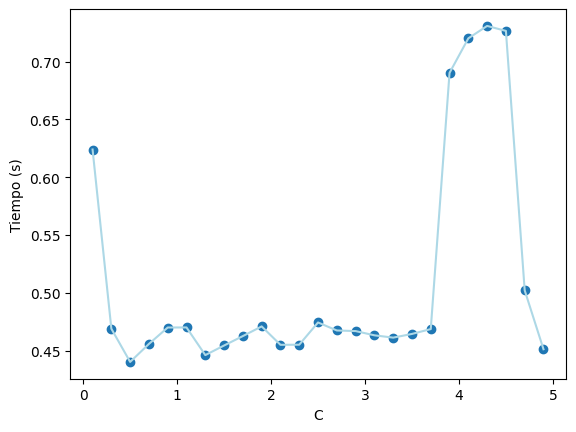

In [ ]:
plt.scatter(cs, tiempos_y_svm)
plt.xlabel("C")
plt.ylabel("Tiempo (s)")
plt.plot(cs, tiempos_y_svm, color='lightblue')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier


profundidades = []
tiempos_y_tree = []
scores_tree = []

for i in range(1, 400, 10):
  arbol = DecisionTreeClassifier(max_depth=i)
  test_global_auc, fit_time_tree = cv_with_metrics(arbol, X_dev, y_dev, scoring, cv=balanced_k_fold, full_text=False)
  profundidades.append(i)
  tiempos_y_tree.append(fit_time_tree)
  scores_tree.append(test_global_auc)

Crossvalidation metrics for DecisionTreeClassifier(max_depth=1)...

AUC [VALIDATION]:
    Global --> 0.577
    Folds: 
    	Raw --> [0.54, 0.591, 0.55, 0.545, 0.608]
    	Mean --> 0.567
    	STD --> 0.028 
    	Median --> 0.550
Crossvalidation metrics for DecisionTreeClassifier(max_depth=11)...

AUC [VALIDATION]:
    Global --> 0.603
    Folds: 
    	Raw --> [0.545, 0.671, 0.656, 0.585, 0.548]
    	Mean --> 0.601
    	STD --> 0.053 
    	Median --> 0.585
Crossvalidation metrics for DecisionTreeClassifier(max_depth=21)...

AUC [VALIDATION]:
    Global --> 0.594
    Folds: 
    	Raw --> [0.606, 0.679, 0.585, 0.567, 0.535]
    	Mean --> 0.595
    	STD --> 0.048 
    	Median --> 0.585
Crossvalidation metrics for DecisionTreeClassifier(max_depth=31)...

AUC [VALIDATION]:
    Global --> 0.583
    Folds: 
    	Raw --> [0.545, 0.645, 0.669, 0.474, 0.581]
    	Mean --> 0.583
    	STD --> 0.070 
    	Median --> 0.581
Crossvalidation metrics for DecisionTreeClassifier(max_depth=41)...

AUC [VALID

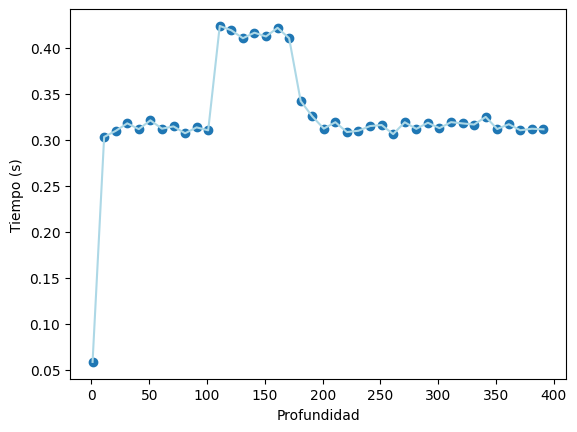

In [ ]:
plt.scatter(profundidades, tiempos_y_tree)
plt.xlabel("Profundidad")
plt.ylabel("Tiempo (s)")
plt.plot(profundidades, tiempos_y_tree, color='lightblue')

plt.show()

## 4.2 Old)

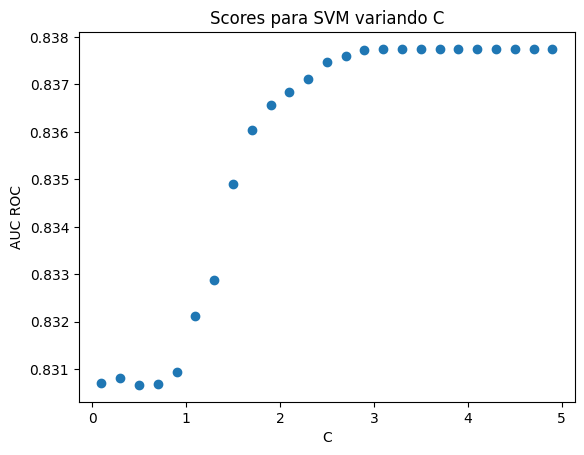

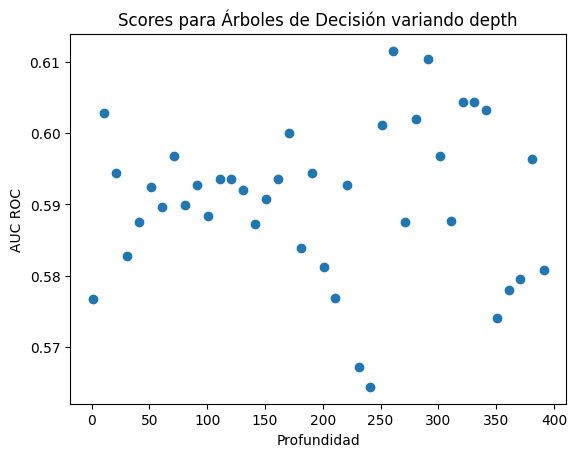

In [ ]:
plt.scatter(cs, scores_svm)
plt.title("Scores para SVM variando C")
plt.xlabel("C")
plt.ylabel("AUC ROC")
plt.show()

plt.scatter(profundidades, scores_tree)
plt.title("Scores para Árboles de Decisión variando depth")
plt.xlabel("Profundidad")
plt.ylabel("AUC ROC")
plt.show()

Con los valores de AUC ROC obtenidos podemos ver que para el SVM aumentar el valor de C (mayor grado de regularización) mejora la performance sobre datos no vistos, lo que sugiere que si aumentaramos la cantidad de datos debería ayudar en la tarea de capturar información de la relación entre los features y el target. 
Por el contrario, la dispersión en el gráfico de los AUC score de los árboles al ir aumentando la profundidad del árbol hasta 400 sugiere que no mejorará la performance, por lo que en este caso no ayudaría tener más datos. Esto tiene sentido considerando que es un modelo mucho más simple y no deber estar llegando a aprovechar ni si quiera la totalidad de la información que tenemos ahora.

## 4.3) Old creo que hay que borrarlo porq no es lo q pide :S 

In [ ]:
features = []
tiempos_y = []
scores = []

# Probamos max_features de 1, 5, 10 ... 50
for i in range(1, 50, 5):
  randomforest = RandomForestClassifier(n_estimators=200, max_features=i)
  auc, t = cv_with_metrics(randomforest, X_dev, y_dev, scoring, cv=balanced_k_fold, score_train=True, full_text=False)
  features.append(i)
  tiempos_y.append(t)
  scores.append(auc)

# Probamos max_features de 50, 60 ... 90
for i in range(50, 100, 10):
  randomforest = RandomForestClassifier(n_estimators=200, max_features=i)
  auc, t = cv_with_metrics(randomforest, X_dev, y_dev, scoring, cv=balanced_k_fold, score_train=True, full_text=False)
  features.append(i)
  tiempos_y.append(t)
  scores.append(auc)

# Probamos max_features de 100, 150, 200
for i in range(100, 201, 50):
  randomforest = RandomForestClassifier(n_estimators=200, max_features=i)
  auc, t = cv_with_metrics(randomforest, X_dev, y_dev, scoring, cv=balanced_k_fold, score_train=True, full_text=False)
  features.append(i)
  tiempos_y.append(t)
  scores.append(auc)


Crossvalidation metrics for RandomForestClassifier(max_features=1, n_estimators=200)...

AUC [VALIDATION]:
    Global --> 0.748
    Folds: 
    	Raw --> [0.845, 0.78, 0.744, 0.74, 0.656]
    	Mean --> 0.753
    	STD --> 0.061 
    	Median --> 0.744
Crossvalidation metrics for RandomForestClassifier(max_features=6, n_estimators=200)...

AUC [VALIDATION]:
    Global --> 0.802
    Folds: 
    	Raw --> [0.8, 0.791, 0.834, 0.813, 0.776]
    	Mean --> 0.803
    	STD --> 0.020 
    	Median --> 0.800
Crossvalidation metrics for RandomForestClassifier(max_features=11, n_estimators=200)...

AUC [VALIDATION]:
    Global --> 0.774
    Folds: 
    	Raw --> [0.746, 0.787, 0.804, 0.732, 0.785]
    	Mean --> 0.771
    	STD --> 0.027 
    	Median --> 0.785
Crossvalidation metrics for RandomForestClassifier(max_features=16, n_estimators=200)...

AUC [VALIDATION]:
    Global --> 0.801
    Folds: 
    	Raw --> [0.762, 0.781, 0.807, 0.838, 0.822]
    	Mean --> 0.802
    	STD --> 0.027 
    	Median --> 0.80

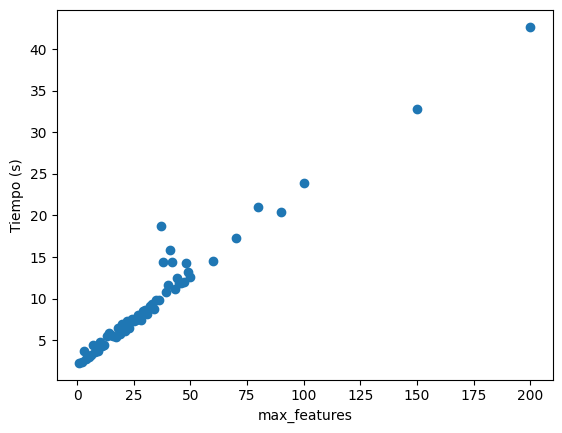

In [ ]:
plt.scatter(features, tiempos_y)
plt.xlabel("max_features")
plt.ylabel("Tiempo (s)")
plt.show()

max features = The number of features to consider when looking for the best 


El hiperparámetro `max_features` representa el número de features a tener en cuenta cuando buscamos el mejor corte. Resulta sencillo observar la correlacion entre el valor de este hiperparámetro y la performance del modelo, ya que basta notar que dado que estamos tratando con árboles, todo el tiempo estamos buscando realizar los mejores cortes; por lo tanto a mayor cantidad de features posibles vamos a tener que evaluar una mayor cantidad de posibilidades a la hora de realizar un corte. Esto nos permite concluir que existe una relación lineal entre el tiempo que demora correr el algoritmo y el valor de max features. 
La clave se basa en buscar el mejor valor, ya que por mas que pensemos que el óptimo podria resultar el más grande (podriamos asumir que si todos los cortes son posibles entonces nuestro arbol va a ser mejor mientras mas opciones tenga) la realidad es que este tipo de pensamiento desencadenara en un modelo que no va a resultar tan útil a la hora de generalizar.

A mayor número de `max_features`, mayor es el número de features tiene que fijarse el algoritmo para determinar cada nivel de los árboles por lo que tardará más tiempo en realizar este paso si el número de features a mirar es mayor.

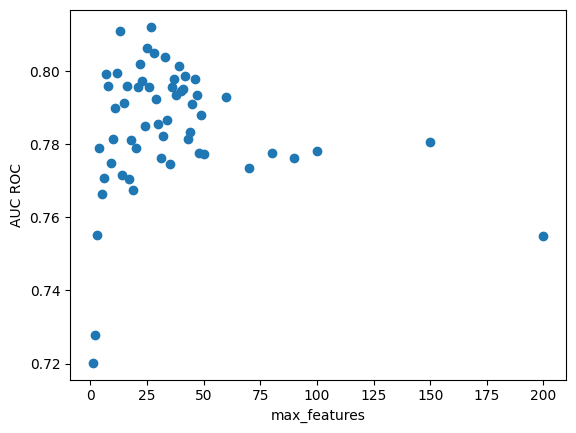

In [ ]:
plt.scatter(features, scores)
plt.xlabel("max_features")
plt.ylabel("AUC ROC")
plt.show()

In [ ]:
print(f"El mejor AUC ROC parece ser para max_features={features[np.argmax(scores)]}.")

El mejor AUC ROC parece ser para max_features=27.


El AUC ROC no es malo pero podría mejorarse con más datos, considerando además que tenemos 500 datos para aprender decisiones sobre 200 features.


Como ya adelantamos en el apartado anterior, podemos ver que el número óptimo de features para el modelo iba a estar entre el máximo y el mínimo (no era ideal colocar 200 como max features). Sin embargo, es marcadamente superior al Árbol de Decisión a secas, mejoría esperada teniendo en cuenta que es un ensamble de árboles de decisión con tuneos finos específicos que suelen mejorar la performance.
